In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset/Assignment2/

Mounted at gdrive
/content/gdrive/My Drive/Dataset/Assignment2


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import metrics
import seaborn as sn
import os.path
import joblib

In [ ]:
test = sio.loadmat('dataset_2.mat')
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])

In [ ]:
data = test['samples']
labels = test['labels']
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
print(labels[0].T.shape)
print(data)
print(labels)

2
(10000, 2)
2
(1, 10000)
(10000,)
[[-1.43675238 -3.9265797 ]
 [-2.00349195 -3.54813747]
 [-0.73024538 -4.45436567]
 ...
 [-3.0936506   3.44629184]
 [ 6.43886415  3.20051189]
 [ 5.34614831  3.80708106]]
[[0 0 0 ... 1 3 3]]


In [ ]:
#data2 = np.hsplit(data1,2)
xaxis = []
yaxis = []
for x in data:
  xaxis.append(x[0])
  yaxis.append(x[1])
print(len(xaxis))

10000


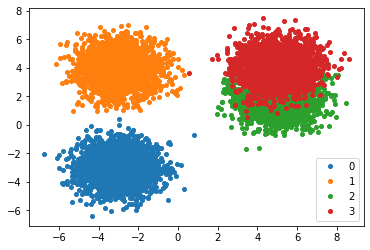

In [ ]:
df = pd.DataFrame(dict(x=xaxis, y=yaxis, label=labels[0]))
groups = df.groupby('label')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()
plt.show()

## Split

In [ ]:
def traintestsplit(df):
  # shuffle = []
  shuffle = np.random.permutation(len(df))
  # for i in range(len(df)):
  #   shuffle.append(i)
  test_size = int(len(df) * 0.2)
  set1 = shuffle[:test_size]
  set2 = shuffle[test_size:test_size*2]
  set3 = shuffle[test_size*2:test_size*3]
  set4 = shuffle[test_size*3:test_size*4]
  set5 = shuffle[test_size*4:]
  dataset1 = df.iloc[set1]
  dataset2 = df.iloc[set2]
  dataset3 = df.iloc[set3]
  dataset4 = df.iloc[set4]
  dataset5 = df.iloc[set5]
  return [dataset1, dataset2, dataset3, dataset4, dataset5]

In [ ]:
print(df) 

             x         y  label
0    -1.436752 -3.926580      0
1    -2.003492 -3.548137      0
2    -0.730245 -4.454366      0
3    -2.997647 -4.502650      0
4    -3.353432 -4.616474      0
...        ...       ...    ...
9995  4.702887  2.357193      2
9996  4.772458  1.608002      2
9997 -3.093651  3.446292      1
9998  6.438864  3.200512      3
9999  5.346148  3.807081      3

[10000 rows x 3 columns]


In [ ]:
def againsplit(train, test):
  features = ['x','y']
  xtrain = train[features]
  xtest = test[features]
  ytrain = train.label
  ytest = test.label
  return xtrain, ytrain, xtest, ytest

## b) OvO and OvA

In [ ]:
class LogRegression(object):
    """docstring for LogRegression."""
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False):
        super(LogRegression, self).__init__()
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    """You can give any required inputs to the fit()"""
    def fit(self, X, y):
      if self.fit_intercept:
          X = self.__add_intercept(X)
        
        # weights initialization
      self.theta = np.zeros(X.shape[1])
        
      for i in range(self.num_iter):
          z = np.dot(X, self.theta)
          h = self.__sigmoid(z)
          gradient = np.dot(X.T, (h - y)) / y.size
          self.theta -= self.lr * gradient
            
          if(self.verbose == True and i % 10000 == 0):
              z = np.dot(X, self.theta)
              h = self.__sigmoid(z)
              print(f'loss: {self.__loss(h, y)} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return np.round(self.predict_prob(X))
    def predictaccurate(self, X):
        return self.predict_prob(X)


### Main

In [ ]:
def classseparator(frame):  
  separated = []
  for i in range(4):
    separated.append(frame.loc[frame['label'] == i])
  # print(separated)
  return separated

In [ ]:
%rm

rm: missing operand
Try 'rm --help' for more information.


In [ ]:
def lgregr(xtrain, ytrain, name, strvar):
  regr = LogRegression()
  filename = strvar + str(name[0]) + str(name[1]) + ".pkl"
  if os.path.isfile(filename):
      regr = joblib.load(filename)
      #print("Loading Existing model")
  else :
      regr.fit(xtrain, ytrain)
      joblib.dump(regr, filename)

### OVO - Map

In [ ]:
ovomark = []
ovomark.append([0, 1])
ovomark.append([0, 2])
ovomark.append([0, 3])
ovomark.append([2, 1])
ovomark.append([3, 1])
ovomark.append([2, 3])

In [ ]:
def ovosplit(frame):
  features = ['x','y']
  xtrain = frame[features]
  ytrain = frame.label
  return xtrain, ytrain

In [ ]:
def most_frequent(List): 
    return max(set(List), key = List.count) 

In [ ]:
def findAccuracy(ytest, y_predict):
  ptr = 0
  neg = 0
  total = len(ytest)
  for i in ytest:
    if(i != y_predict[ptr]):
      neg+=1
    ptr+=1
  return (total - neg)/total

In [ ]:
plottrain = []
plottest = []

In [ ]:
def performanceOVO(train, test, strvar):
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  ytrainpred = []
  ytestpred = []
  trainacc = []
  validacc = []
  for i in ovomark:
    filename = strvar + str(i[0]) + str(i[1]) + ".pkl" 
    regr = joblib.load(filename)
    pred1 = regr.predict(xtrain)
    pred2 = regr.predict(xtest)

    # Change data [0/1] - > OVOMARK Format
    for j in range(len(pred1)):
      if pred1[j] == 0:
        pred1[j] = i[0]
      else:
        pred1[j] = i[1]
    for j in range(len(pred2)):
      if pred2[j] == 0:
        pred2[j] = i[0]
      else:
        pred2[j] = i[1]
    
    ytrainpred.append(pred1)
    ytestpred.append(pred2)
  
  # Select the most frequent one [Voting]
  for i in range(len(ytrainpred[0])):
    temp = []
    for j in range(len(ytrainpred)):
      temp.append(ytrainpred[j][i])
    trainacc.append(most_frequent(temp))
  
  for i in range(len(ytestpred[0])):
    temp = []
    for j in range(len(ytestpred)):
      temp.append(ytestpred[j][i])
    validacc.append(most_frequent(temp))

  plottrain.append(findAccuracy(ytrain, trainacc))
  plottest.append(findAccuracy(ytest, validacc))

In [ ]:
for k in range(5):
  # Carry out new fold
  var = traintestsplit(df)
  test = var[k]
  var.pop(k)
  train = pd.concat(var)
  separated = classseparator(train)

  # Preprocessing
  ovo = []
  for i in range(4):
    for j in range(i+1, 4):
      ovo.append(pd.concat([separated[i], separated[j]]))
  ovo[1]["label"].replace(2, 1, inplace=True)
  ovo[2]["label"].replace(3, 1, inplace=True)
  ovo[3]["label"].replace(2, 0, inplace=True)
  ovo[4]["label"].replace(3, 0, inplace=True)
  ovo[5]["label"].replace(2, 0, inplace=True)
  ovo[5]["label"].replace(3, 1, inplace=True)


  for i in range(len(ovo)):
    xtrain, ytrain = ovosplit(ovo[i])
    lgregr(xtrain, ytrain, ovomark[i], "ovo")
  
  performanceOVO(train, test, "ovo")

## OVO Table

In [ ]:
print("5fold permomance " + str(j)+ " :")
p = pd.DataFrame()
p['Training'] = plottrain
p['Validation'] = plottest
print(p)

5fold permomance 3 :
   Training  Validation
0  0.911750      0.9100
1  0.910500      0.9150
2  0.912250      0.9080
3  0.909000      0.9210
4  0.909875      0.9175


In [ ]:
%ls

2.Accuracy0.png    2.Loss0.png   2.train2.png  2.valid4.png   ovo21.pkl
2.Accuracy1.png    2.Loss1.png   2.train3.png  dataset_1.mat  ovo23.pkl
2.Accuracy2.png    2.Loss2.png   2.train4.png  dataset_2.mat  ovo31.pkl
2.Accuracy3.png    2.Loss3.png   2.valid0.png  Dataset.data
2.Accuracy4.png    2.Loss4.png   2.valid1.png  ovo01.pkl
2.L2Accuracy0.png  2.train0.png  2.valid2.png  ovo02.pkl
2.L2Loss0.png      2.train1.png  2.valid3.png  ovo03.pkl


## c) OVA

In [ ]:
ovamark = []
ovamark.append([0, 5])
ovamark.append([1, 5])
ovamark.append([2, 5])
ovamark.append([3, 5])

In [ ]:
plottrain = []
plottest = []

In [ ]:
def performanceOVA(train, test, strvar):
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  ytrainpred = []
  ytestpred = []
  trainacc = []
  validacc = []
  for i in ovamark:
    filename = strvar + str(i[0]) + str(i[1]) + ".pkl" 
    regr = joblib.load(filename)
    pred1 = regr.predictaccurate(xtrain)
    pred2 = regr.predictaccurate(xtest)
    
    ytrainpred.append(pred1)
    ytestpred.append(pred2)
  
  for i in range(len(ytrainpred[0])):
    ptr = 0
    mx = 1
    for j in range(len(ytrainpred)):
      if ytrainpred[j][i] < mx:
        mx = ytrainpred[j][i]
        ptr = j
    trainacc.append(ptr)

  for i in range(len(ytestpred[0])):
    ptr = 0
    mx = 1
    for j in range(len(ytestpred)):
      if ytestpred[j][i] < mx:
        mx = ytestpred[j][i]
        ptr = j
    validacc.append(ptr)

  plottrain.append(findAccuracy(ytrain, trainacc))
  plottest.append(findAccuracy(ytest, validacc))

In [ ]:
%rm *.pkl
%ls

2.Accuracy0.png  2.L2Accuracy0.png  2.Loss3.png   2.train3.png  2.valid3.png
2.Accuracy1.png  2.L2Loss0.png      2.Loss4.png   2.train4.png  2.valid4.png
2.Accuracy2.png  2.Loss0.png        2.train0.png  2.valid0.png  dataset_1.mat
2.Accuracy3.png  2.Loss1.png        2.train1.png  2.valid1.png  dataset_2.mat
2.Accuracy4.png  2.Loss2.png        2.train2.png  2.valid2.png  Dataset.data


In [ ]:
for k in range(5):
  var = traintestsplit(df)
  test = var[k]
  var.pop(k)
  train = pd.concat(var)
  separated = classseparator(train)
  
  ova = []
  for i in range(4):
    temp = []
    temp.append(separated[i])
    for j in range(4):
      if i != j:
        tempdf = separated[j].copy()
        tempdf['label'].replace(j,5, inplace = True)
        temp.append(tempdf)
    ova.append(pd.concat(temp))

  ova[0]["label"].replace(0, 0, inplace=True)
  ova[1]["label"].replace(1, 0, inplace=True)
  ova[2]["label"].replace(2, 0, inplace=True)
  ova[3]["label"].replace(3, 0, inplace=True)
  ova[0]["label"].replace(5, 1, inplace=True)
  ova[1]["label"].replace(5, 1, inplace=True)
  ova[2]["label"].replace(5, 1, inplace=True)
  ova[3]["label"].replace(5, 1, inplace=True)

  for i in range(len(ova)):
    xtrain, ytrain = ovosplit(ova[i])
    lgregr(xtrain, ytrain, ovamark[i], "ova")
  
  performanceOVA(train, test, "ova")

In [ ]:
print("5fold permomance " + str(j) + " :")
p = pd.DataFrame()
p['Training'] = plottrain
p['Validation'] = plottest
print(p)

5fold permomance 3 :
   Training  Validation
0  0.911125      0.9110
1  0.911625      0.9090
2  0.910125      0.9150
3  0.913625      0.9010
4  0.911500      0.9095


## d) Build IN function

In [ ]:
from sklearn.linear_model import LogisticRegression
def sklgregr(xtrain, ytrain, name, strvar):
  regr = LogisticRegression()
  filename = strvar + str(name[0]) + str(name[1]) + ".pkl"
  if os.path.isfile(filename):
      regr = joblib.load(filename)
      #print("Loading Existing model")
  else :
      regr.fit(xtrain, ytrain)
      joblib.dump(regr, filename)

In [ ]:
plottrain = []
plottest = []

for k in range(5):
  # Carry out new fold
  var = traintestsplit(df)
  test = var[k]
  var.pop(k)
  train = pd.concat(var)
  separated = classseparator(train)

  # Preprocessing
  ovo = []
  for i in range(4):
    for j in range(i+1, 4):
      ovo.append(pd.concat([separated[i], separated[j]]))
  ovo[1]["label"].replace(2, 1, inplace=True)
  ovo[2]["label"].replace(3, 1, inplace=True)
  ovo[3]["label"].replace(2, 0, inplace=True)
  ovo[4]["label"].replace(3, 0, inplace=True)
  ovo[5]["label"].replace(2, 0, inplace=True)
  ovo[5]["label"].replace(3, 1, inplace=True)


  for i in range(len(ovo)):
    xtrain, ytrain = ovosplit(ovo[i])
    sklgregr(xtrain, ytrain, ovomark[i], "3d.ovo")
  
  performanceOVO(train, test, "3d.ovo")

In [ ]:
print("5fold permomance" + str(j) + " :")
p = pd.DataFrame()
p['Training'] = plottrain
p['Validation'] = plottest
print(p)

5fold permomance3 :
   Training  Validation
0  0.924500      0.9245
1  0.924250      0.9255
2  0.922875      0.9310
3  0.924500      0.9245
4  0.925000      0.9225


In [ ]:
def performanceOVA2(train, test, strvar):
  xtrain, ytrain, xtest, ytest = againsplit(train, test)
  ytrainpred = []
  ytestpred = []
  trainacc = []
  validacc = []
  for i in ovamark:
    filename = strvar + str(i[0]) + str(i[1]) + ".pkl" 
    regr = joblib.load(filename)
    pred1 = regr.predict(xtrain)
    pred2 = regr.predict(xtest)
    
    ytrainpred.append(pred1)
    ytestpred.append(pred2)
  
  
  for i in range(len(ytrainpred[0])):
    ptr = 0
    mx = 1
    for j in range(len(ytrainpred)):
      if ytrainpred[j][i] < mx:
        mx = ytrainpred[j][i]
        ptr = j
    trainacc.append(ptr)

  for i in range(len(ytestpred[0])):
    ptr = 0
    mx = 1
    for j in range(len(ytestpred)):
      if ytestpred[j][i] < mx:
        mx = ytestpred[j][i]
        ptr = j
    validacc.append(ptr)

  plottrain.append(findAccuracy(ytrain, trainacc))
  plottest.append(findAccuracy(ytest, validacc))

In [ ]:
plottrain = []
plottest = []


for k in range(5):
  var = traintestsplit(df)
  test = var[k]
  var.pop(k)
  train = pd.concat(var)
  separated = classseparator(train)
  
  ova = []
  for i in range(4):
    temp = []
    temp.append(separated[i])
    for j in range(4):
      if i != j:
        tempdf = separated[j].copy()
        tempdf['label'].replace(j,5, inplace = True)
        temp.append(tempdf)
    ova.append(pd.concat(temp))

  ova[0]["label"].replace(0, 0, inplace=True)
  ova[1]["label"].replace(1, 0, inplace=True)
  ova[2]["label"].replace(2, 0, inplace=True)
  ova[3]["label"].replace(3, 0, inplace=True)
  ova[0]["label"].replace(5, 1, inplace=True)
  ova[1]["label"].replace(5, 1, inplace=True)
  ova[2]["label"].replace(5, 1, inplace=True)
  ova[3]["label"].replace(5, 1, inplace=True)

  for i in range(len(ova)):
    xtrain, ytrain = ovosplit(ova[i])
    sklgregr(xtrain, ytrain, ovamark[i], "3d.ova")
  
  performanceOVA2(train, test, "3d.ova")

In [ ]:
print("5fold permomance" + str(j) + " :")
p = pd.DataFrame()
p['Training'] = plottrain
p['Validation'] = plottest
print(p)

5fold permomance3 :
   Training  Validation
0   0.84600       0.838
1   0.84500       0.842
2   0.84400       0.846
3   0.84250       0.852
4   0.84275       0.851
